The dataset is a thorough compilation of data about movies that includes both qualitative and quantitative characteristics. Every record reflects a distinct film and offers information about its identity, genre, release date, country of production, financial performance, audience reaction, and major players.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emanfatima2025/comprehensive-films-dataset-for-analysis")

print("Path to dataset files:", path)
#  C:\Users\Administrator\.cache\kagglehub\datasets\emanfatima2025\comprehensive-films-dataset-for-analysis\versions\1

Path to dataset files: C:\Users\Administrator\.cache\kagglehub\datasets\emanfatima2025\comprehensive-films-dataset-for-analysis\versions\1


In [2]:
import os

name=os.listdir(path)
# print(name)

In [3]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "movies_dataset.csv"))

# Infos

Conclusion:

we have a dataset with 999999 rows and 17 columns, not duplicate and null values.
Numerical columns: ['MovieID', 'ReleaseYear', 'BudgetUSD', 'US_BoxOfficeUSD','Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD',
                    'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT']
Categorical columns: ['Title', 'Genre', 'ReleaseDate', 'Country', 'Director', 'LeadActor']

In [4]:

# Check data
df.head()

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
0,1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
1,2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
2,3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
3,4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
4,5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS


In [5]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

In [6]:
# Check for dataset shape
df.shape

(999999, 17)

In [7]:
# Check for missing values  
df.isna().sum()

MovieID                 0
Title                   0
Genre                   0
ReleaseYear             0
ReleaseDate             0
Country                 0
BudgetUSD               0
US_BoxOfficeUSD         0
Global_BoxOfficeUSD     0
Opening_Day_SalesUSD    0
One_Week_SalesUSD       0
IMDbRating              0
RottenTomatoesScore     0
NumVotesIMDb            0
NumVotesRT              0
Director                0
LeadActor               0
dtype: int64

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

In [9]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['number']).columns
num_cols, len(num_cols)

(Index(['MovieID', 'ReleaseYear', 'BudgetUSD', 'US_BoxOfficeUSD',
        'Global_BoxOfficeUSD', 'Opening_Day_SalesUSD', 'One_Week_SalesUSD',
        'IMDbRating', 'RottenTomatoesScore', 'NumVotesIMDb', 'NumVotesRT'],
       dtype='object'),
 11)

In [10]:
# Identify categorical columns
cat_cols = df.select_dtypes(exclude=['number']).columns
cat_cols, len(cat_cols)

(Index(['Title', 'Genre', 'ReleaseDate', 'Country', 'Director', 'LeadActor'], dtype='object'),
 6)

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(f"  Sample values: {df[col].sample(5).values}")

MovieID: 999999 unique values
  Sample values: [  6710 564207  88234 629320 958066]
Title: 9665 unique values
  Sample values: ['Western form' 'Police message wait' 'Include woman know' 'Hundred scene'
 'Collection necessary']
Genre: 8 unique values
  Sample values: ['Drama' 'Drama' 'Thriller' 'Romance' 'Drama']
ReleaseYear: 76 unique values
  Sample values: [2002 2022 1970 1995 2023]
ReleaseDate: 27757 unique values
  Sample values: ['14-11-1958' '01-05-2009' '08-09-2020' '26-10-1993' '29-08-2022']
Country: 10 unique values
  Sample values: ['USA' 'India' 'USA' 'India' 'USA']
BudgetUSD: 988182 unique values
  Sample values: [ 5449554.91 12116113.73  9711080.97  5111489.9   4224115.51]
US_BoxOfficeUSD: 999610 unique values
  Sample values: [ 1042961.28   137914.21 14023556.99 20188302.31  3163834.31]
Global_BoxOfficeUSD: 998527 unique values
  Sample values: [17836866.73 13622518.15  2240761.85  7126994.28  4416178.  ]
Opening_Day_SalesUSD: 997984 unique values
  Sample values: [352871

In [12]:
big_nunique_cols = [col for col in df.columns if df[col].nunique() > 80000]

# Little engineering

Here i set my dataset index with the column MovieID, and i split my comlumn ReleaseDate(day month year) to 3 other column (ReleaseDay, ReleaseMonth, ReleaseYear). 
Null and duplicate values remain same

In [13]:
data=df.copy(deep=True)

In [14]:
# Set MovieID as index

data.set_index('MovieID', inplace=True)

In [15]:
data

,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
MovieID,,,,,,,,,,,,,,,,
1,Might toward capital,Comedy,2003,28-09-2003,China,6577427.79,6613685.82,15472035.66,1778530.85,3034053.32,6.2,58,7865,10596,Kristina Moore,Brian Mccormick
2,He however experience,Comedy,1988,14-02-1988,USA,1883810.10,1930949.15,3637731.12,247115.74,831828.84,5.2,44,1708,220,Benjamin Hudson,Ashley Pena
3,Star responsibility politics,Comedy,1971,02-11-1971,USA,2468079.29,4186694.69,7165111.24,878453.95,2171405.93,5.5,55,4678,7805,Kayla Young,Alexander Haley
4,Exactly live,Comedy,1998,06-08-1998,USA,1447311.46,2023683.92,4373820.26,570657.72,898886.01,7.3,87,2467,1751,Michael Ross,Patrick Barnett
5,Focus improve especially,Documentary,2021,17-12-2021,India,900915.86,2129629.10,3113017.38,361189.37,861775.91,6.1,67,5555,697,Faith Franklin,Duane Fletcher DDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,He anyone,Action,2011,14-09-2011,China,648176.38,1075869.51,2624306.41,170212.67,614079.92,4.8,58,12664,586,Nathan Bolton,Stephanie Moore
999996,Single yourself sister collection,Horror,1982,27-08-1982,USA,657167.15,1046949.86,2164587.12,119899.27,564950.72,7.3,83,622,2327,David Lee,Tracy Klein
999997,Old economic,Documentary,1993,12-02-1993,USA,29914685.15,30619499.73,57774787.73,6331667.63,18136941.88,4.1,32,100,1394,Jeremy Davis,Lynn Pierce


In [17]:
# Remove columns with too many unique values for visualization
big_nunique_cols = [col for col in data.columns if data[col].nunique() > 80000]
big_nunique_cols

['BudgetUSD',
 'US_BoxOfficeUSD',
 'Global_BoxOfficeUSD',
 'Opening_Day_SalesUSD',
 'One_Week_SalesUSD']

In [18]:
# split ReleaseDate into year, month, day and drop original column

data['ReleaseDate'] = pd.to_datetime(data['ReleaseDate'], errors='coerce',dayfirst=True)
data['ReleaseYear'] = data['ReleaseDate'].dt.year
data['ReleaseMonth'] = data['ReleaseDate'].dt.month
data['ReleaseDay'] = data['ReleaseDate'].dt.day
data.drop(columns=['ReleaseDate'], inplace=True)

In [ ]:
import numpy as np

In [23]:
data['US_BoxOfficeUSD'].max(),np.log10(data['US_BoxOfficeUSD'].max()),10**np.log10(data['US_BoxOfficeUSD'].max())

(1018197889.0, 9.007832192292165, 1018197889.0000013)

In [ ]:
# Apply log transformation to skewed numerical columns
data['BudgetUSD']=data['BudgetUSD'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['US_BoxOfficeUSD']=data['US_BoxOfficeUSD'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['Global_BoxOfficeUSD']=data['Global_BoxOfficeUSD'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['Opening_Day_SalesUSD']=data['Opening_Day_SalesUSD'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['One_Week_SalesUSD']=data['One_Week_SalesUSD'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['NumVotesIMDb']=data['NumVotesIMDb'].map(lambda x: np.log10(x) if x > 0 else 0 )
data['NumVotesRT']=data['NumVotesRT'].map(lambda x: np.log10(x) if x > 0 else 0 )

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999999 entries, 1 to 999999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Title                 999999 non-null  object 
 1   Genre                 999999 non-null  object 
 2   ReleaseYear           999999 non-null  int32  
 3   Country               999999 non-null  object 
 4   BudgetUSD             999999 non-null  float64
 5   US_BoxOfficeUSD       999999 non-null  float64
 6   Global_BoxOfficeUSD   999999 non-null  float64
 7   Opening_Day_SalesUSD  999999 non-null  float64
 8   One_Week_SalesUSD     999999 non-null  float64
 9   IMDbRating            999999 non-null  float64
 10  RottenTomatoesScore   999999 non-null  int64  
 11  NumVotesIMDb          999999 non-null  float64
 12  NumVotesRT            999999 non-null  float64
 13  Director              999999 non-null  object 
 14  LeadActor             999999 non-null  object 
 15  Relea

In [64]:
data.duplicated().sum(), data.isna().sum().sum()

(0, 0)

In [65]:
data.to_csv("cleaned_movies_dataset.csv", index=True)

# Plot using Matplotlib and seaborn

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

## Distribution

this dataset contains some imbalance culumns(ex: country, genre). The columns bind time are not significant in distribition ploting.
Some columns can't be display because they contain much unique values. And columns bind to rating follow a normal low and contains . 

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(30, 30))
ax = ax.flatten()
for i, col in enumerate(data.drop(big_nunique_cols,axis=1).columns):
    ax[i].set_figsize=(10, 10)
    sns.histplot(data[col], kde=True,ax=ax[i])
plt.show()

KeyboardInterrupt: 

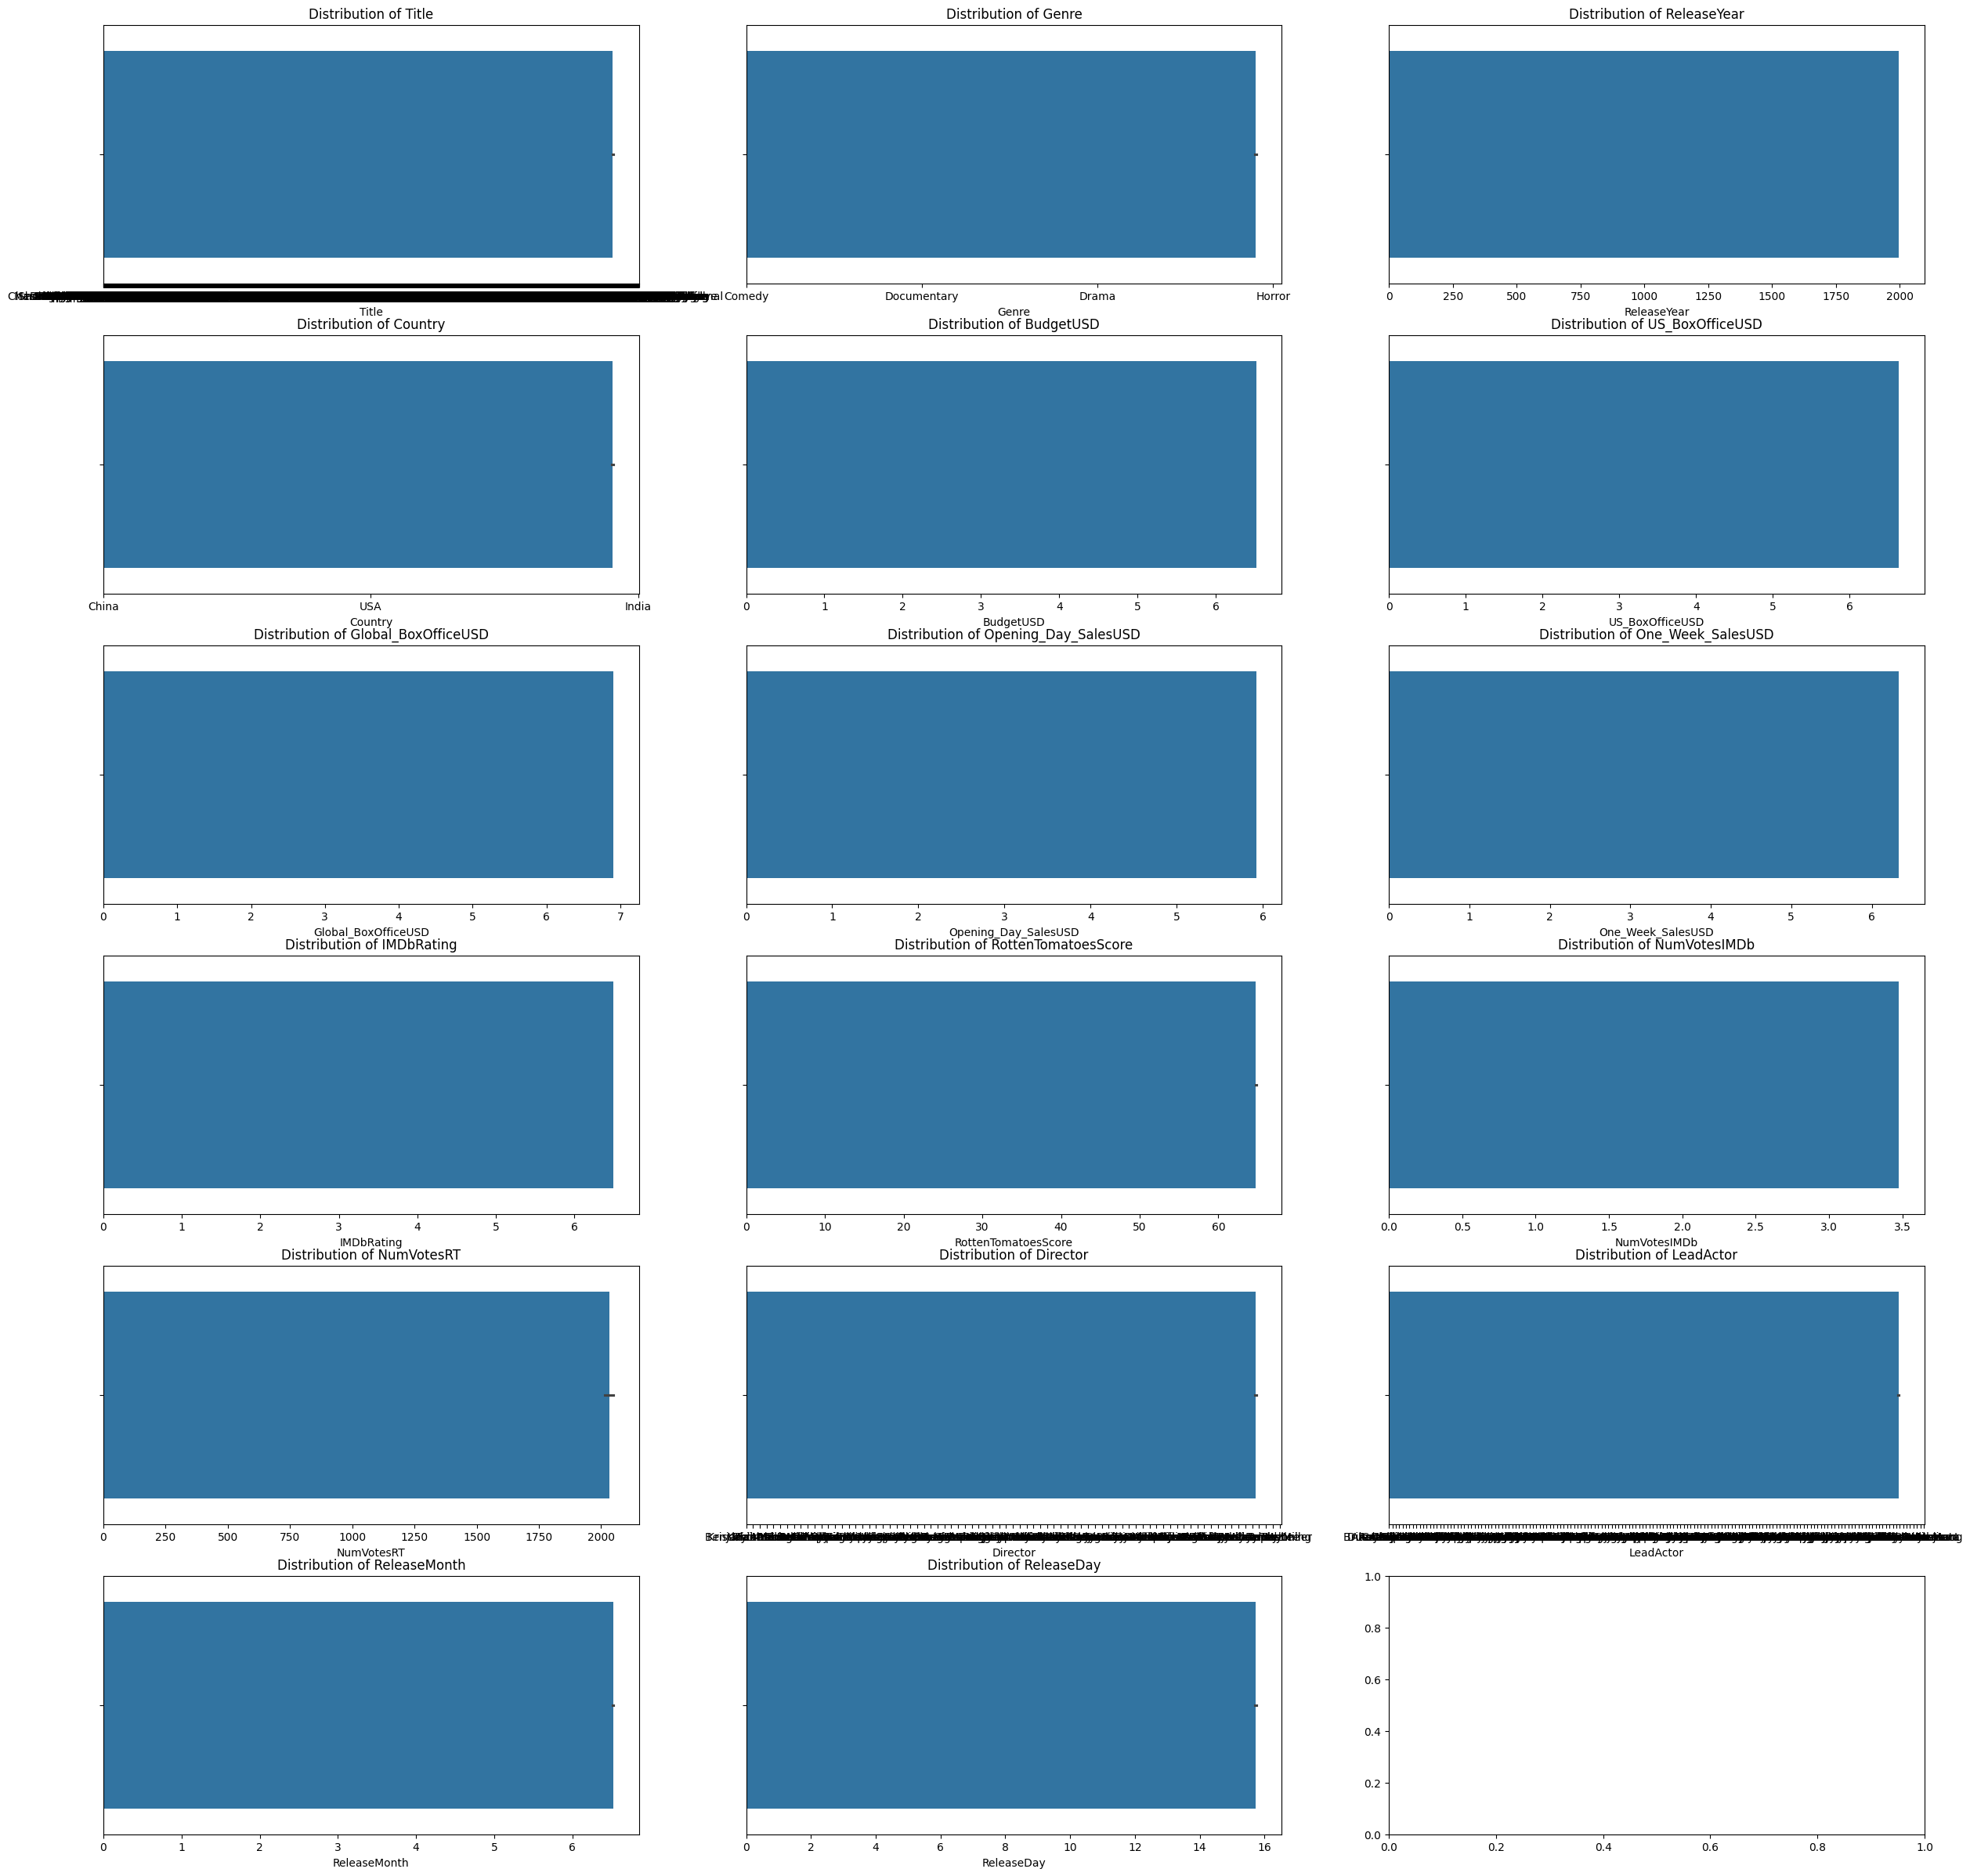

In [ ]:
fig, ax = plt.subplots(6,3,figsize=(30, 30))
ax = ax.flatten()
for i, col in enumerate(data.columns):
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_figsize=(10, 10)
    sns.barplot(data=data,x=data[col], ax=ax[i])
plt.show()

## Outliers

the columns bind rating and Country get much outliers. At this state of project i will let outliers and after my first modelisation i  will wether i need
feature engineering for this side(outliers)

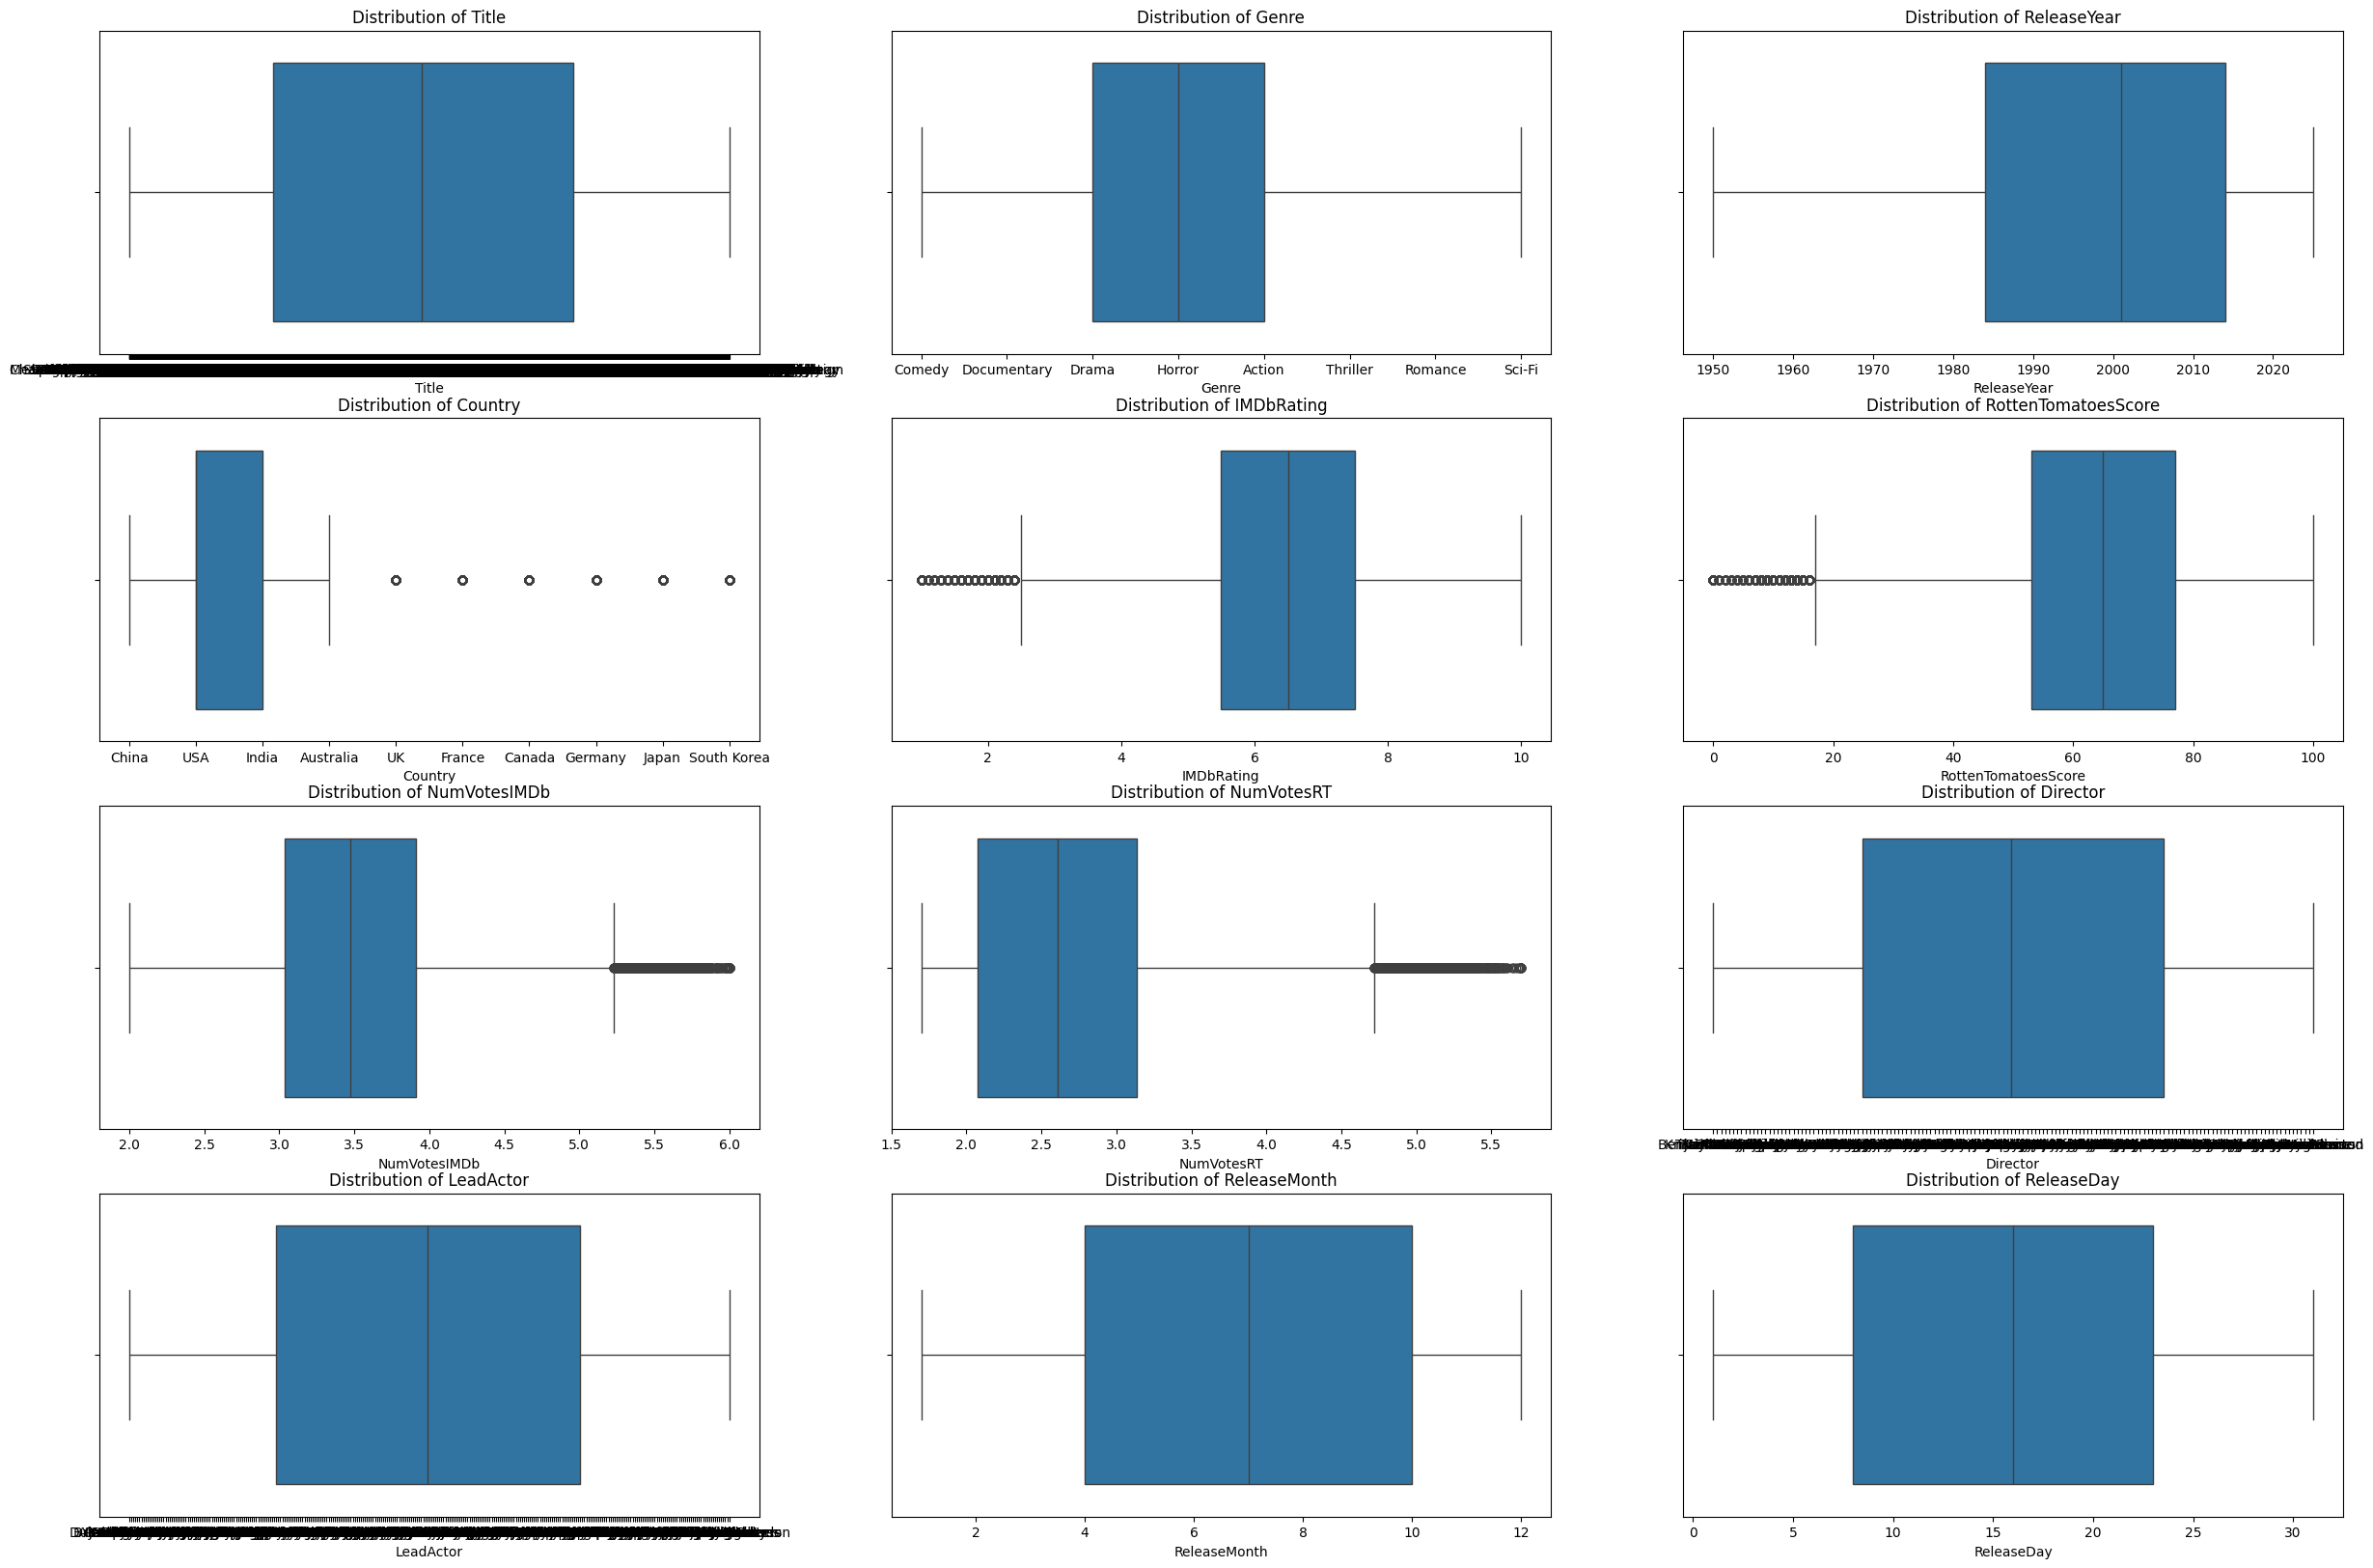

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(30, 20))
ax = ax.flatten()
for i, col in enumerate(data.drop(big_nunique_cols,axis=1).columns):
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_figsize=(5, 5)
    sns.boxplot(data=data,x=data[col], ax=ax[i])

In [ ]:
data.describe()

,ReleaseYear,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,ReleaseMonth,ReleaseDay
count,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000
mean,1998.001220,6.516375,6.641983,6.907097,5.923224,6.338092,6.494788,64.776426,3.476615,2.653520,6.521019,15.729277
std,19.260863,0.644912,0.687035,0.683470,0.700031,0.688903,1.485606,17.592474,0.644336,0.701115,3.445407,8.804192
min,1950.000000,5.000000,4.602336,5.000000,3.607505,4.217679,1.000000,0.000000,2.000000,1.698970,1.000000,1.000000
25%,1984.000000,6.075733,6.173129,6.441282,5.445645,5.868241,5.500000,53.000000,3.034628,2.075547,4.000000,8.000000
50%,2001.000000,6.513988,6.642353,6.907961,5.923618,6.338344,6.500000,65.000000,3.474653,2.607455,7.000000,16.000000
75%,2014.000000,6.954377,7.109783,7.372036,6.399736,6.807206,7.500000,77.000000,3.913390,3.133539,10.000000,23.000000
max,2025.000000,8.477121,9.007832,9.175946,8.470926,8.763095,10.000000,100.000000,6.000000,5.698970,12.000000,31.000000


In [ ]:
# outlier iqr

def outlier_iqr(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    min_val, max_val = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return min_val, max_val

In [ ]:
min,max=outlier_iqr(data,'RottenTomatoesScore')

In [ ]:
data[data['RottenTomatoesScore'] < min].shape

(3663, 17)

## Relationship

Columns bind budget and rating get much correlation between themselves but remain correlation are near to 0, then i will use deep learning for model and embendding for  
categorical columns encoding

<Axes: >

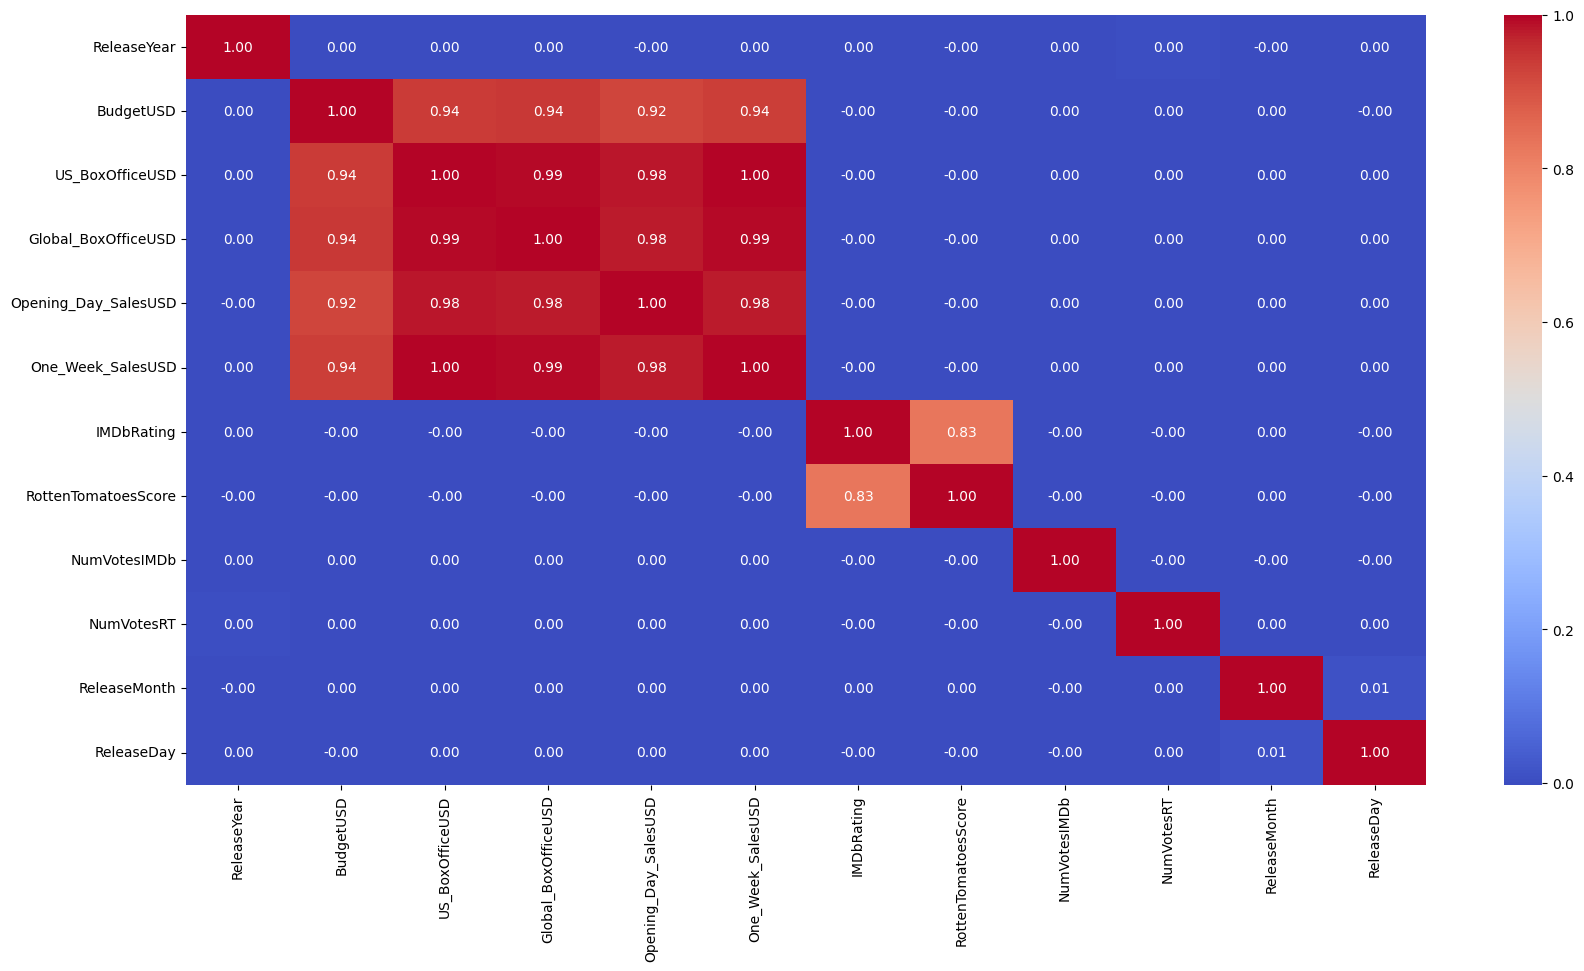

In [ ]:
#  Relationship between numerical columns
fig, ax = plt.subplots(1,1,figsize=(20, 10))
num_col=data.select_dtypes(include=['number']).columns
sns.heatmap(data=data[num_col].corr(), annot=True, cmap='coolwarm',ax=ax,fmt='.2f') 

In [ ]:
# Pipeline for categorical encoding columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

cat_cols=data.select_dtypes(exclude=['number']).columns
target='US_BoxOfficeUSD'
num_cols=data.drop(target,axis=1).select_dtypes(include=['number']).columns

cat_pipeline=Pipeline([
    ('ordinal',OrdinalEncoder()),
    # ('scaler',RobustScaler())

])
num_pipeline=Pipeline([
    ('scaler',RobustScaler())
])
trans=ColumnTransformer([
    ('cat',cat_pipeline,cat_cols),
    ('num',num_pipeline,num_cols)
], remainder='passthrough')

trans.fit(data)
data_preprocess=trans.transform(data)
data_preprocess=pd.DataFrame(data_preprocess,columns=[f'{col.replace("cat__","")}' if col.startswith('cat') else f'{col.replace("num__","")}' for col in trans.get_feature_names_out() ])
data_preprocess[target]=data_preprocess['remainder__US_BoxOfficeUSD']
data_preprocess.drop(columns=['remainder__US_BoxOfficeUSD'],inplace=True)
data_preprocess.head()

,Title,Genre,Country,Director,LeadActor,ReleaseYear,BudgetUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,ReleaseMonth,ReleaseDay,US_BoxOfficeUSD
0,5069.0,1.0,2.0,92.0,38.0,0.066667,0.346065,0.302536,0.342151,0.153019,-0.15,-0.291667,0.479135,1.339979,0.333333,0.800000,6.820444
1,3656.0,1.0,9.0,13.0,24.0,-0.433333,-0.271954,-0.372955,-0.556255,-0.445501,-0.65,-0.875000,-0.275576,-0.250505,-0.833333,-0.133333,6.285771
2,8074.0,1.0,9.0,87.0,4.0,-1.000000,-0.138428,-0.056661,0.021068,-0.001707,-0.50,-0.416667,0.222366,1.214487,0.666667,-0.933333,6.621871
3,2774.0,1.0,9.0,108.0,228.0,-0.100000,-0.402241,-0.286971,-0.175290,-0.409642,0.40,0.916667,-0.093864,0.600979,0.166667,-0.666667,6.306143
4,3153.0,2.0,5.0,53.0,95.0,0.666667,-0.636554,-0.445637,-0.383489,-0.429143,-0.20,0.083333,0.307286,0.222854,0.833333,0.066667,6.328304


<Axes: >

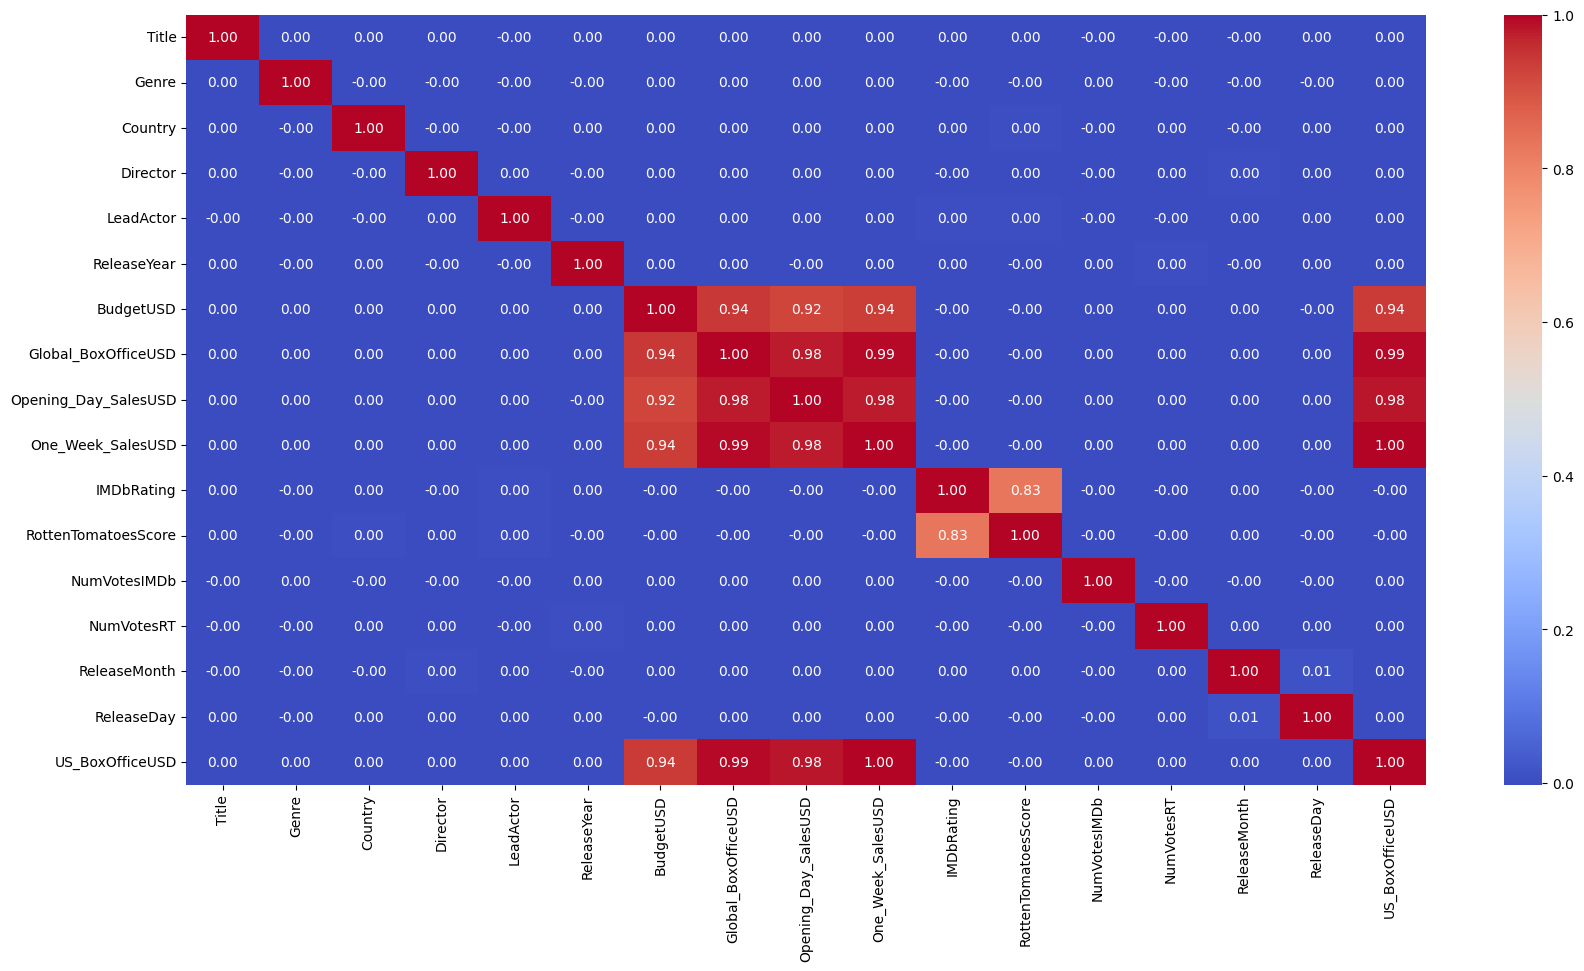

In [ ]:
#  Relationship between categorical columns
fig, ax = plt.subplots(1,1,figsize=(20, 10))
sns.heatmap(data=data_preprocess.corr(), annot=True, cmap='coolwarm',ax=ax,fmt='.2f') 

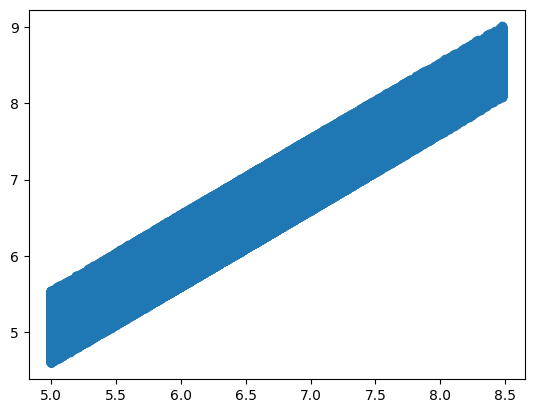

In [ ]:
plt.scatter(data['BudgetUSD'],data['US_BoxOfficeUSD'])

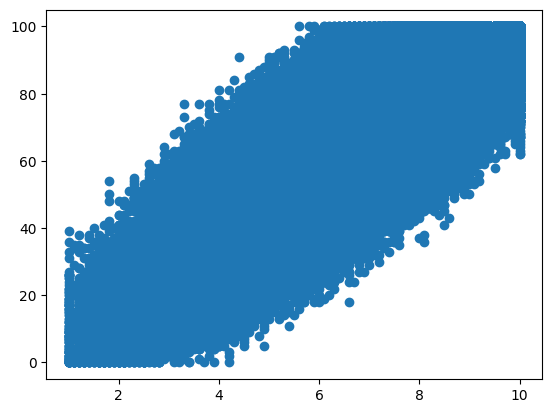

In [ ]:
plt.scatter(data['IMDbRating'],data['RottenTomatoesScore'])


In [ ]:
data_preprocess.to_csv('processed_data.csv',index=False)